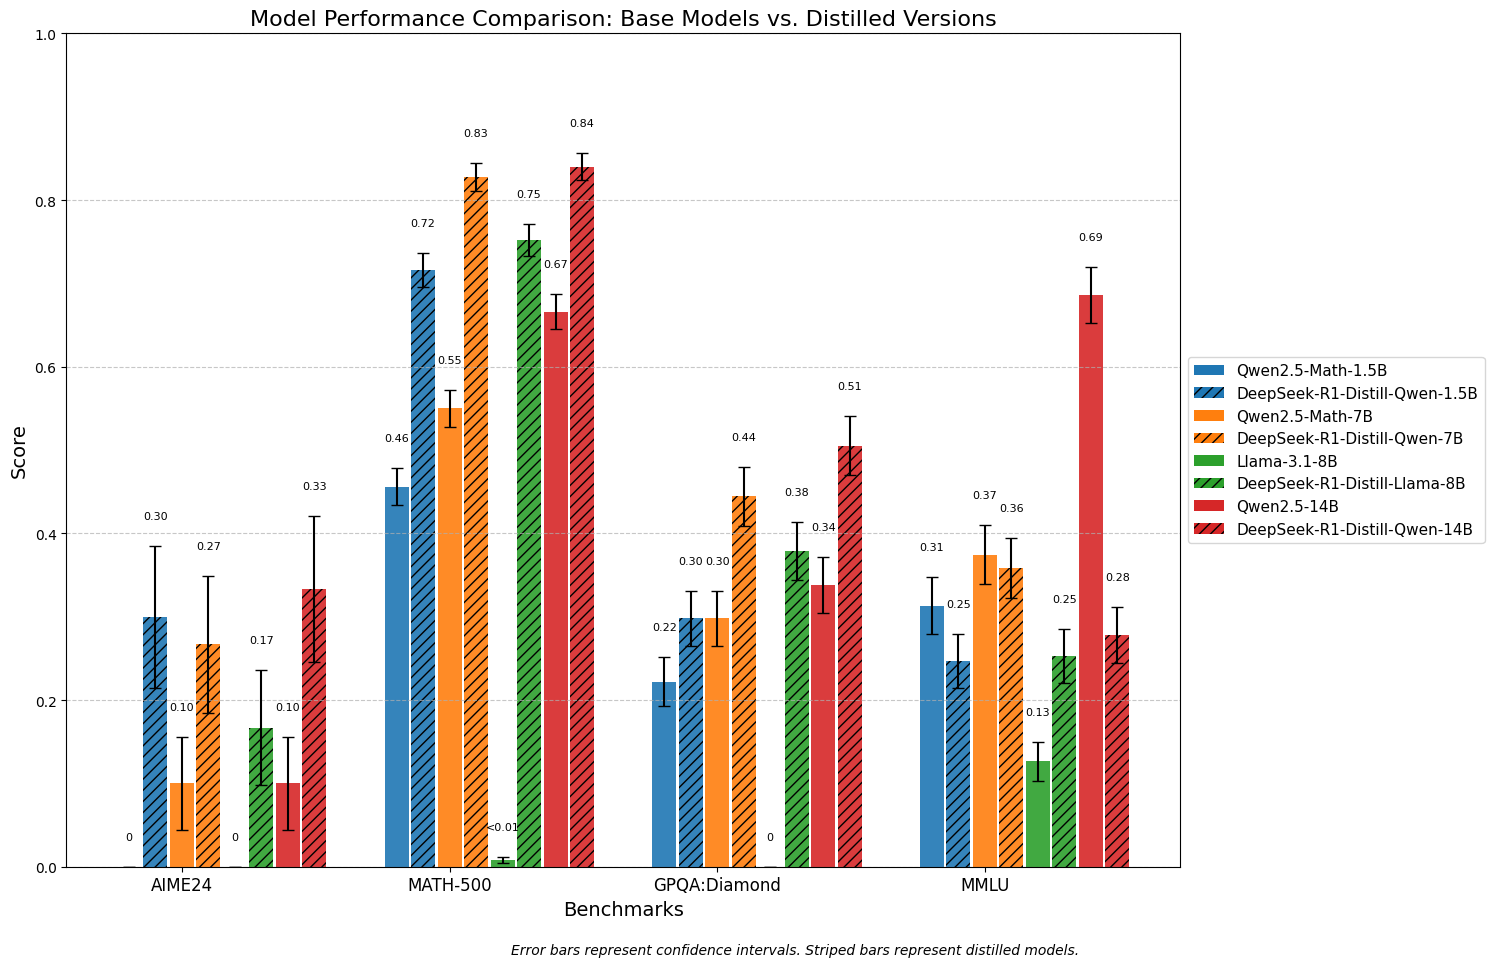

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define model names in pairs (base model followed by its distill)
models = [
    "Qwen2.5-Math-1.5B",
    "DeepSeek-R1-Distill-Qwen-1.5B",
    "Qwen2.5-Math-7B",
    "DeepSeek-R1-Distill-Qwen-7B",
    "Llama-3.1-8B",
    "DeepSeek-R1-Distill-Llama-8B", 
    "Qwen2.5-14B",
    "DeepSeek-R1-Distill-Qwen-14B"
]

# Define benchmarks (removing GSM8k)
benchmarks = ["AIME24", "MATH-500", "GPQA:Diamond", "MMLU"]

# Create data matrices for scores and confidence intervals (removing GSM8k column at index 3)
full_scores = np.array([
    [0.0, 0.456, 0.2222, 0.0, 0.3132],
    [0.3, 0.716, 0.298, 0.0, 0.247],
    [0.1, 0.55, 0.298, 0.8218, 0.3742],
    [0.2667, 0.828, 0.4444, 0.0099, 0.3584],
    [0.0, 0.008, 0.0, 0.0, 0.1263],
    [0.1667, 0.752, 0.3788, 0.0, 0.2527],
    [0.1, 0.666, 0.3384, 0.8453, 0.6863],
    [0.3333, 0.84, 0.5051, 0.0371, 0.2784]
])

# Remove GSM8k column (index 3)
scores = np.delete(full_scores, 3, axis=1)

# Confidence intervals - using the ± values (removing GSM8k column)
full_errors = np.array([
    [0.0, 0.0223, 0.0296, 0.0, 0.0345],
    [0.0851, 0.0202, 0.0326, 0.0, 0.0321],
    [0.0557, 0.0223, 0.0326, 0.0105, 0.0355],
    [0.0821, 0.0169, 0.0354, 0.0027, 0.0355],
    [0.0, 0.004, 0.0, 0.0, 0.0237],
    [0.0692, 0.0193, 0.0346, 0.0, 0.0324],
    [0.0557, 0.0211, 0.0337, 0.0100, 0.0336],
    [0.0875, 0.0164, 0.0356, 0.0052, 0.0335]
])

# Remove GSM8k column (index 3)
errors = np.delete(full_errors, 3, axis=1)

# Set up the figure and axes for better readability
plt.figure(figsize=(16, 10))
ax = plt.subplot(111)

# Width of each bar and spacing
bar_width = 0.09
index = np.arange(len(benchmarks))

# Define colors for model pairs (4 pairs = 4 colors)
pair_colors = [plt.cm.tab10.colors[i] for i in range(4)]

# Function to round scores for display
def format_score(score):
    if score == 0:
        return "0"
    elif score < 0.01:
        return "<0.01"
    else:
        return f"{score:.2f}"

# Plot each model's performance in pairs
for i in range(0, len(models), 2):
    # Base model (solid)
    base_bars = plt.bar(
        index + (i//2) * bar_width * 2.2 - (4 * bar_width * 1.1 / 2),
        scores[i],
        bar_width,
        alpha=0.9,
        label=models[i],
        color=pair_colors[i//2],
        yerr=errors[i],
        capsize=4
    )
    
    # Add text labels for base model
    for j, bar in enumerate(base_bars):
        height = bar.get_height()
        error = errors[i, j]
        # Position the label above the error bar
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + error + 0.03,
            format_score(scores[i, j]),
            ha='center',
            va='bottom',
            fontsize=8,
            rotation=0
        )
    
    # Distill model (striped)
    distill_bars = plt.bar(
        index + (i//2) * bar_width * 2.2 - (4 * bar_width * 1.1 / 2) + bar_width * 1.1,
        scores[i+1],
        bar_width,
        alpha=0.9,
        label=models[i+1],
        color=pair_colors[i//2],
        hatch='///',
        yerr=errors[i+1],
        capsize=4
    )
    
    # Add text labels for distill model
    for j, bar in enumerate(distill_bars):
        height = bar.get_height()
        error = errors[i+1, j]
        # Position the label above the error bar
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + error + 0.03,
            format_score(scores[i+1, j]),
            ha='center',
            va='bottom',
            fontsize=8,
            rotation=0
        )

# Add labels, title, and legend
plt.xlabel('Benchmarks', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Model Performance Comparison: Base Models vs. Distilled Versions', fontsize=16)
plt.xticks(index, benchmarks, fontsize=12)
plt.ylim(0, 1.0)  # Set y-axis limits for better visualization

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Shrink current axis to make room for legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

# Create a custom legend with model pairs grouped visually
from matplotlib.patches import Patch
legend_elements = []
for i in range(0, len(models), 2):
    legend_elements.append(Patch(facecolor=pair_colors[i//2], label=models[i]))
    legend_elements.append(Patch(facecolor=pair_colors[i//2], hatch='///', label=models[i+1]))

plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)

# Add explanatory notes
plt.figtext(0.5, 0.01, 'Error bars represent confidence intervals. Striped bars represent distilled models.', 
           ha='center', fontsize=10, style='italic')

plt.tight_layout(rect=[0, 0.03, 0.75, 0.97])
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
from datasets import load_dataset
# open-r1/OpenR1-Math-cn_k12-86k
openr1_source = load_dataset("open-r1/OpenR1-Math-220k", "extended")
cn_k12_86k =  openr1_source.filter(lambda example: example["source"] == "cn_k12", num_proc=32)
# cn_k12_86k.push_to_hub("Neelectric/OpenR1-Math-cn_k12-86k")
# cn_k12_86k['train'][0]

In [36]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/OLMo-2-1124-7B-Instruct")
first = cn_k12_86k["train"][0]
tokenizer.chat_template = "{{ bos_token }}{% for message in messages %}{% if loop.first and messages[0]['role'] != 'system' %}{{ '<|system|>\nYou are a helpful AI Assistant that provides well-reasoned and detailed responses. You first think about the reasoning process as an internal monologue and then provide the user with the answer. Respond in the following format: <think>\n...\n</think>\n<answer>\n...\n</answer>\n<|user|>' + message['content'] + '\n' }}{% elif message['role'] == 'system' %}{{ '<|system|>\n' + message['content'] + '\n' }}{% elif message['role'] == 'user' %}{{ '<|user|>\n' + message['content'] + '\n' }}{% elif message['role'] == 'assistant' %}{% if not loop.last %}{{ '<|assistant|>\n'  + message['content'] + eos_token + '\n' }}{% else %}{{ '<|assistant|>\n'  + message['content'] + eos_token }}{% endif %}{% endif %}{% if loop.last and add_generation_prompt %}{{ '<|assistant|>\n' }}{% endif %}{% endfor %}"
templated = tokenizer.apply_chat_template(first["messages"], tokenize=True)
print(len(templated))
# for elt in templated:
#     print(elt)

2137


In [37]:
tokenized = cn_k12_86k.map(
    lambda x: {"tokenized": tokenizer.apply_chat_template(x["messages"], tokenize=True, truncation=False, add_generation_prompt=False, return_tensors="np")},
    num_proc=16,
    keep_in_memory=True,
    remove_columns=['problem', 'solution', 'answer', 'problem_type', 'question_type', 'source', 'uuid', 'is_reasoning_complete', 'generations', 'correctness_math_verify', 'correctness_llama', 'finish_reasons', 'correctness_count', "messages"]
    )

Map (num_proc=16): 100%|██████████| 91449/91449 [06:53<00:00, 220.98 examples/s] 


In [42]:
len(tokenized["train"]["tokenized"][0])
tokenized["train"]["tokenized"][0]

[[100257,
  27,
  91,
  9125,
  91,
  397,
  2675,
  527,
  264,
  11190,
  15592,
  22103,
  430,
  5825,
  1664,
  5621,
  1525,
  291,
  323,
  11944,
  14847,
  13,
  1472,
  1176,
  1781,
  922,
  279,
  33811,
  1920,
  439,
  459,
  5419,
  1647,
  77828,
  323,
  1243,
  3493,
  279,
  1217,
  449,
  279,
  4320,
  13,
  40633,
  304,
  279,
  2768,
  3645,
  25,
  366,
  27963,
  397,
  9522,
  524,
  27963,
  397,
  27,
  9399,
  397,
  9522,
  524,
  9399,
  397,
  27,
  91,
  882,
  91,
  29,
  791,
  24524,
  315,
  279,
  12960,
  449,
  37442,
  362,
  4172,
  18,
  11,
  482,
  16,
  8,
  323,
  426,
  7,
  20,
  11,
  220,
  20,
  8,
  439,
  279,
  23899,
  374,
  33771,
  627,
  27,
  91,
  78191,
  91,
  397,
  14023,
  771,
  397,
  33413,
  11,
  779,
  358,
  1205,
  311,
  1505,
  279,
  24524,
  315,
  264,
  12960,
  1405,
  279,
  37442,
  315,
  279,
  23899,
  527,
  2728,
  439,
  3585,
  362,
  4172,
  18,
  11,
  482,
  16,
  8,
  323,
  426,
  7,
  20,


In [39]:
flattened = [inner_list for inner_list in tokenized["train"]["tokenized"]]
len(flattened[0])

1

In [40]:
lengths = [len(item) for item in tokenized["train"]["tokenized"]]  # Calculate the lengths of each list

# Count the number of prompts longer than 4096 tokens
long_prompts_count = sum(1 for length in lengths if length < 4096)

print(f"Number of prompts longer than 4096 tokens: {long_prompts_count}")

Number of prompts longer than 4096 tokens: 91449


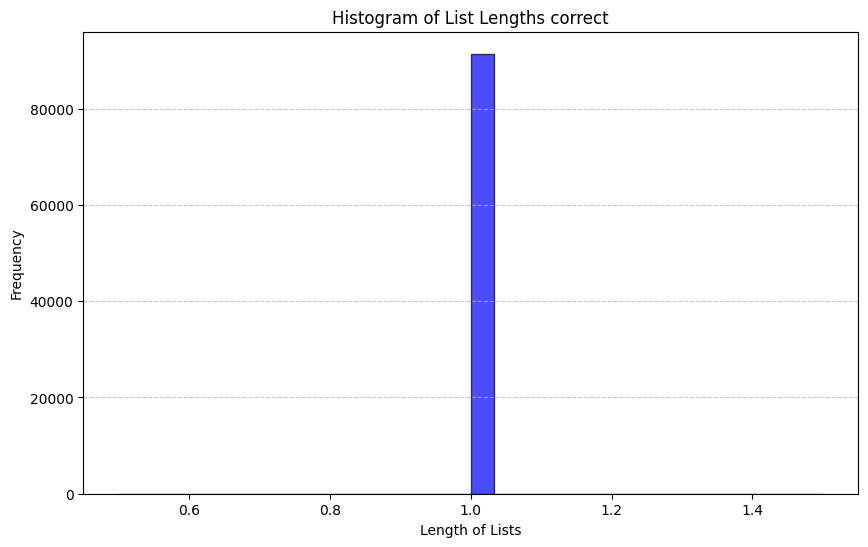

In [41]:
import matplotlib.pyplot as plt

# Assuming `flattened` is your list of lists
lengths = [len(item) for item in flattened]  # Calculate the lengths of each list

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of List Lengths correct')
plt.xlabel('Length of Lists')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [21]:
import torch

# a = torch.rand(4,4)
# b = torch.rand(4,4)
a = torch.tensor([[0.5254, 0.8263, 0.1103, 0.6887],
        [0.7013, 0.7164, 0.6873, 0.9029],
        [0.6708, 0.8965, 0.9968, 0.5985],
        [0.9541, 0.2370, 0.1919, 0.3051]])
changes = torch.normal(mean=0.25, std=0.01, size=(4,4))
# b = a - changes
b = torch.tensor([[ 0.2809,  0.5760, -0.1527,  0.4445],
        [ 0.4645,  0.4603,  0.4453,  0.6472],
        [ 0.4006,  0.6414,  0.7197,  0.3567],
        [ 0.7122, -0.0041, -0.0389,  0.0560]])
print("a", a)
print("b", b)
diff = a - b
print("diff", diff)
torch.mean(diff)

a tensor([[0.5254, 0.8263, 0.1103, 0.6887],
        [0.7013, 0.7164, 0.6873, 0.9029],
        [0.6708, 0.8965, 0.9968, 0.5985],
        [0.9541, 0.2370, 0.1919, 0.3051]])
b tensor([[ 0.2809,  0.5760, -0.1527,  0.4445],
        [ 0.4645,  0.4603,  0.4453,  0.6472],
        [ 0.4006,  0.6414,  0.7197,  0.3567],
        [ 0.7122, -0.0041, -0.0389,  0.0560]])
diff tensor([[0.2445, 0.2503, 0.2630, 0.2442],
        [0.2368, 0.2561, 0.2420, 0.2557],
        [0.2702, 0.2551, 0.2771, 0.2418],
        [0.2419, 0.2411, 0.2308, 0.2491]])


tensor(0.2500)

In [24]:
c = torch.rand(3,3)
changes = torch.normal(mean=0.25, std=0.01, size=(3,3))


print("c", c)
print("changes", changes)






c tensor([[0.5731, 0.8768, 0.2054],
        [0.1616, 0.6533, 0.2414],
        [0.4180, 0.3704, 0.3781]])
changes tensor([[0.2559, 0.2604, 0.2494],
        [0.2437, 0.2495, 0.2608],
        [0.2467, 0.2613, 0.2591]])


In [8]:
norm_of_diff = torch.linalg.norm(a - b).item()
norm_of_base = torch.linalg.norm(a).item()
print(norm_of_diff)
print(norm_of_base)
torch.sum(torch.abs(a - b))

1.4447088241577148
2.7276062965393066


tensor(4.7265)